In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#  Simulation Goal: 
If a ₹100 crore ETF tracks this index, and the index weight changes as given, how much does the ETF buy/sell of each stock?



In [2]:
df = pd.read_csv(r"C:\Users\chira\Downloads\mock_index_rebalance_data.csv")


df.head()

,Stock,Market_Cap,Weight_Before,Weight_After,Avg_Daily_Volume
0,STOCKA,141958,0.016724,0.042868,786
1,STOCKB,35795,0.005901,0.076751,1057
2,STOCKC,20860,0.198324,0.157399,662
3,STOCKD,123694,0.090629,0.119655,1999
4,STOCKE,148106,0.121411,0.072830,1690


In [3]:
# Total fund size = 100 Crores

total_funds = 100  # in Crores

# Step 1 : Calculate change in weight
df["Weight_Change"] = df["Weight_After"] - df["Weight_Before"]

# Step 2 : Calculate fund flow = weight change * total fund

df["Flow_Amount"] = df["Weight_Change"] * total_funds

In [4]:
# Flow as % of average traded volume

df["Flow_to_Volume_%"] = (df["Flow_Amount"] / df["Avg_Daily_Volume"]) * 100

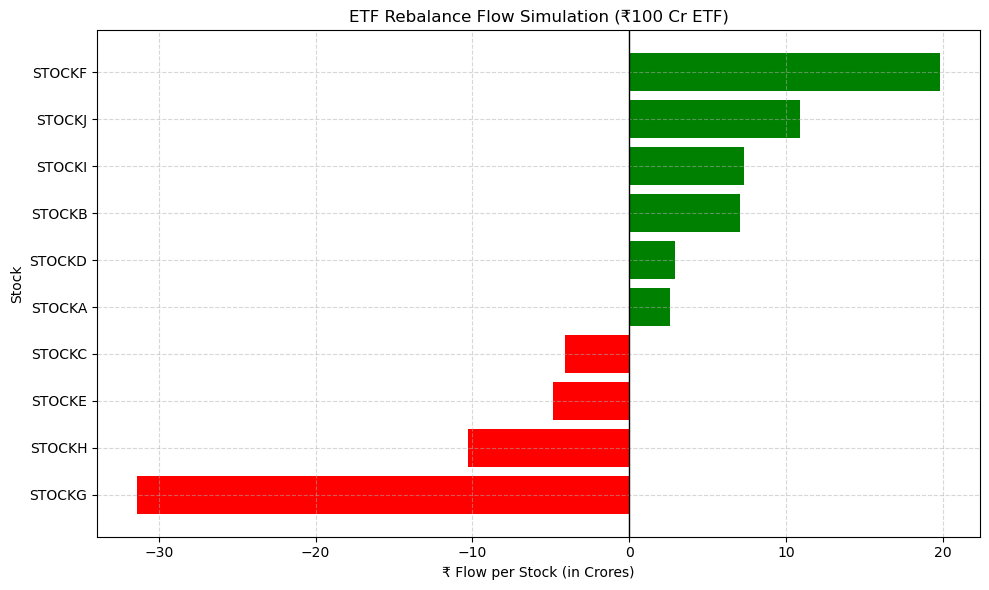

In [5]:
# Sorting stocks by flow amount

df_sorted = df.sort_values("Flow_Amount")

# Setting colors: red for outflow, green for inflow

colors = df_sorted["Flow_Amount"].apply(lambda x: "green" if x > 0 else "red")


# Plotting the chart

plt.figure(figsize = (10,6))
plt.barh(df_sorted["Stock"],
         df_sorted["Flow_Amount"],
         color = colors
        )
plt.axvline(0, color = "black", linewidth = 1)

plt.title("ETF Rebalance Flow Simulation (₹100 Cr ETF)")

plt.xlabel("₹ Flow per Stock (in Crores)")
plt.ylabel("Stock")

plt.grid(True, linestyle = "--", alpha = 0.5)
plt.tight_layout()

plt.show()

 Top 5 High-Pressure Stocks


In [6]:
df["Abs_Flow_to_Volume_%"] = df["Flow_to_Volume_%"].abs()

# Sorting by pressure
top_pressure = df.sort_values("Abs_Flow_to_Volume_%", ascending = False).head(5)

top_pressure[['Stock', 'Flow_Amount', 'Avg_Daily_Volume', 'Flow_to_Volume_%']]

,Stock,Flow_Amount,Avg_Daily_Volume,Flow_to_Volume_%
6,STOCKG,-31.369293,931,-3.369419
5,STOCKF,19.818042,1367,1.449747
9,STOCKJ,10.904870,1608,0.678164
1,STOCKB,7.085018,1057,0.670295
7,STOCKH,-10.305295,1628,-0.633003


In [7]:
#  Plotting High-Pressure Stocks

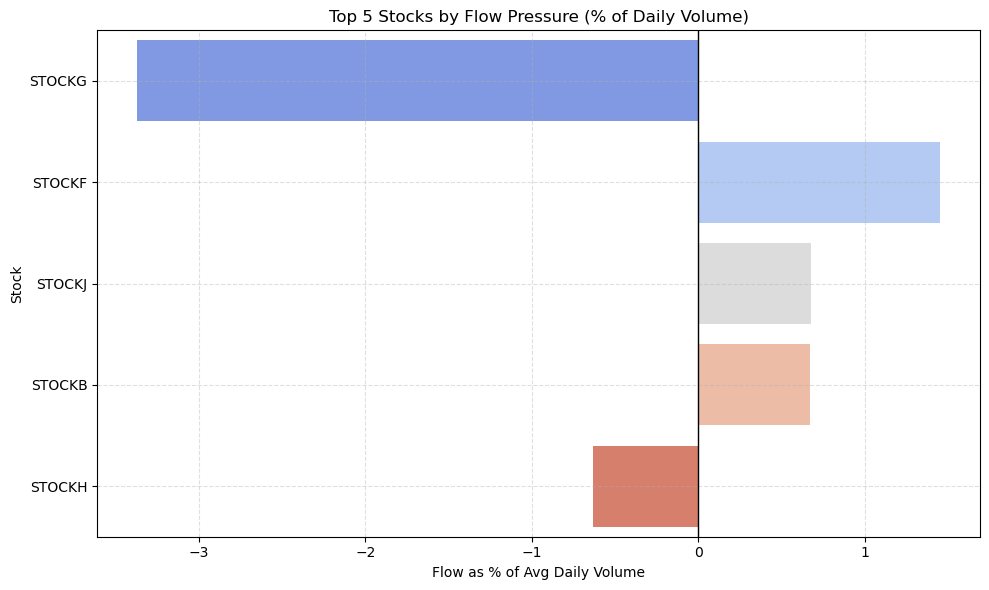

In [8]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.barplot(data = top_pressure,
            x = "Flow_to_Volume_%",
            y = "Stock",
            hue = "Stock",
            legend = False,
            palette = "coolwarm",
            orient = "h"
           )
plt.axvline(0, color = "black", linewidth = 1)
plt.title("Top 5 Stocks by Flow Pressure (% of Daily Volume)")
plt.xlabel("Flow as % of Avg Daily Volume")
plt.ylabel("Stock")
plt.grid(True, linestyle = "--", alpha = 0.4)

plt.tight_layout()
plt.show()

In [10]:
df.to_csv("6.ETF_rebalance_simulation_output.csv", index=False)